In [64]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import os as os

# Experimentos del TP
En esta carpeta de Jupyer vamos a poner lo relativo a realizar la experimentación computacional.
- **Asegurarse de correr los experimentos en el notebook Experimentos antes de utilizar este notebook.**
- En este archivo se lee el output de los experimentos y se muestra de manera gráfica esos resultados.

# Datasets
Para los experimentos se crean las siguientes familias de instancias para evaluar los distintos métodos.


# Métodos
Los métodos evaluados en este notebook son los siguientes:
- **EG**: Eliminacion Gaussiana.
- **LU**: Factorización LU.

# Experimentos
Leemos el dataframe con todos los resultados.

In [27]:
df_resultados_tiempos = pd.read_csv("./resultados/resultado.csv");
df_resultados_tiempos = df_resultados_tiempos.assign(metodo=df_resultados_tiempos.metodo.map({"0": "EG", "1": "LU"}))

df_resultados_tiempos_EG = df_resultados_tiempos[df_resultados_tiempos["metodo"] == "EG"]
df_resultados_tiempos_LU = df_resultados_tiempos[df_resultados_tiempos["metodo"] == "LU"]


# Carga de .out

In [69]:
def cargar_archivo_a_dataframe(dataframe, archivo, instancia, radios, angulos, num_instancias):
    lista_temperaturas = []
    archivoEntrada = archivo.replace("resultados", "instancias")
    archivoEntrada = archivoEntrada.replace("out", "in")
    archivoEntrada = archivoEntrada.replace("_EG", "")
    archivoEntrada = archivoEntrada.replace("_LU", "")
    with open(archivo, 'r') as f:
        lista_temperaturas = f.read().splitlines()
    with open(archivoEntrada, "r") as entrada:
            lineas=entrada.read().splitlines()
            radioInterno = int(lineas[0].split(" ")[0])
            radioExterno = int(lineas[0].split(" ")[1])
    dataframe.loc[len(dataframe.index)] = [instancia, radioInterno, radioExterno, radios, angulos, num_instancias, lista_temperaturas]



df_instancia_unica = pd.DataFrame({'instancia': [],
                   'radioInterno':0,
                   'radioExterno':0,                
                   'radios': [],
                   'angulos': [],
                   'numero_de_instancias':[],
                   'lista_temperaturas': []})
df_multiples_instancias = pd.DataFrame({'instancia': [],
                   'radioInterno':0,
                   'radioExterno':0,
                   'radios': [],
                   'angulos': [],
                   'numero_de_instancias':[],
                   'lista_temperaturas': []})

instancias = os.listdir("resultados/")
for instancia in instancias: 
    if os.path.isdir(f"resultados/{instancia}"):
        resultados = os.listdir(f"resultados/{instancia}/")
        for resultado in resultados:
            cantRadios = "0"
            cantAngulos = "0"
            num_instancias = "0"
            if instancia == "instancia_ideal" or instancia == "instancia_intercalada":
                cantRadios = resultado.split("X")[0]
                cantAngulos = resultado.split("X")[1].split('.')[0]
                num_instancias = "1"
                cargar_archivo_a_dataframe(df_instancia_unica, f"./resultados/{instancia}/{resultado}", instancia, cantRadios, cantAngulos, num_instancias)
            else :
                cantRadios = "20"
                cantAngulos = "20"
                num_instancias = resultado.split("_")[1].split('.')[0]
                cargar_archivo_a_dataframe(df_multiples_instancias, f"./resultados/{instancia}/{resultado}", instancia, cantRadios, cantAngulos, num_instancias)
        
#df_instancia_unica.to_csv("./resultados/resultado_temperatura_unica_instancia.csv", index=False, header=True)
df_multiples_instancias
#df_multiples_instancias.to_csv("./resultados/resultado_temperatura_multiples_instancias.csv", index=False, header=True)

/home/lovi/.local/lib/python3.8/site-packages/numpy/core/_asarray.py:102: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
  return array(a, dtype, copy=False, order=order)


,instancia,radios,angulos,numero_de_instancias,lista_temperaturas
0,instancia_prendido,20,20,30,"[0.000000, 0.000000, 0.000000, 0.000000, 0.000..."
1,instancia_prendido,20,20,20,"[0.000000, 0.000000, 0.000000, 0.000000, 0.000..."
2,instancia_prendido,20,20,15,"[0.000000, 0.000000, 0.000000, 0.000000, 0.000..."
3,instancia_prendido,20,20,30,"[0.000000, 0.000000, 0.000000, 0.000000, 0.000..."
4,instancia_prendido,20,20,50,"[0.000000, 0.000000, 0.000000, 0.000000, 0.000..."
5,instancia_prendido,20,20,15,"[0.000000, 0.000000, 0.000000, 0.000000, 0.000..."
6,instancia_prendido,20,20,50,"[0.000000, 0.000000, 0.000000, 0.000000, 0.000..."
7,instancia_prendido,20,20,10,"[0.000000, 0.000000, 0.000000, 0.000000, 0.000..."
8,instancia_prendido,20,20,25,"[0.000000, 0.000000, 0.000000, 0.000000, 0.000..."
9,instancia_prendido,20,20,5,"[0.000000, 0.000000, 0.000000, 0.000000, 0.000..."


In [24]:
df_resultados_tiempos

,entrada,salida,metodo,tiempo
0,instancias/instancia_ideal/30X30.in,resultados/instancia_ideal/30X30.out,EG,3784.52
1,instancias/instancia_ideal/35X50.in,resultados/instancia_ideal/35X50.out,EG,27560.4
2,instancias/instancia_ideal/25X5.in,resultados/instancia_ideal/25X5.out,EG,13.5305
3,instancias/instancia_ideal/5X15.in,resultados/instancia_ideal/5X15.out,EG,3.26496
4,instancias/instancia_ideal/25X15.in,resultados/instancia_ideal/25X15.out,EG,275.412
...,...,...,...,...
436,instancias/instancia_intercalada/10X10.in,resultados/instancia_intercalada/10X10.out,LU,6.86203
437,instancias/instancia_intercalada/40X50.in,resultados/instancia_intercalada/40X50.out,LU,44169.8
438,instancias/instancia_intercalada/20X25.in,resultados/instancia_intercalada/20X25.out,LU,679.775
439,instancias/instancia_intercalada/35X30.in,resultados/instancia_intercalada/35X30.out,LU,6408.33


# Separamos los datos en diferentes dataframes

In [28]:
df_resultados_inst_live_EG = df_resultados_tiempos_EG[[
    inst.startswith('instancias/instancia_live') for inst in df_resultados_tiempos_EG["entrada"]
]]

df_resultados_inst_live_LU = df_resultados_tiempos_LU[[
    inst.startswith('instancias/instancia_live') for inst in df_resultados_tiempos_LU["entrada"]
]]

In [29]:
df_resultados_ideal_EG = df_resultados_tiempos_EG[[
    inst.startswith('instancias/instancia_ideal') for inst in df_resultados_tiempos_EG["entrada"]
]]

df_resultados_inst_ideal_LU = df_resultados_tiempos_LU[[
    inst.startswith('instancias/instancia_ideal') for inst in df_resultados_tiempos_LU["entrada"]
]]

In [30]:
df_resultados_prendido_EG = df_resultados_tiempos_EG[[
    inst.startswith('instancias/instancia_prendido') for inst in df_resultados_tiempos_EG["entrada"]
]]

df_resultados_inst_prendido_LU = df_resultados_tiempos_LU[[
    inst.startswith('instancias/instancia_prendido') for inst in df_resultados_tiempos_LU["entrada"]
]]

In [31]:
df_resultados_intercalada_EG = df_resultados_tiempos_EG[[
    inst.startswith('instancias/instancia_intercalada') for inst in df_resultados_tiempos_EG["entrada"]
]]

df_resultados_inst_intercalada_LU = df_resultados_tiempos_LU[[
    inst.startswith('instancias/instancia_intercalada') for inst in df_resultados_tiempos_LU["entrada"]
]]

In [30]:
df_resultados_inst_prendido_LU



,entrada,salida,metodo,tiempo
230,instancias/instancia_prendido/prendido_40.in,resultados/instancia_prendido/prendido_40.out,LU,414.72
231,instancias/instancia_prendido/prendido_5.in,resultados/instancia_prendido/prendido_5.out,LU,366.86
232,instancias/instancia_prendido/prendido_50.in,resultados/instancia_prendido/prendido_50.out,LU,423.495
233,instancias/instancia_prendido/prendido_30.in,resultados/instancia_prendido/prendido_30.out,LU,401.279
234,instancias/instancia_prendido/prendido_35.in,resultados/instancia_prendido/prendido_35.out,LU,411.557
235,instancias/instancia_prendido/prendido_20.in,resultados/instancia_prendido/prendido_20.out,LU,395.274
236,instancias/instancia_prendido/prendido_25.in,resultados/instancia_prendido/prendido_25.out,LU,402.753
237,instancias/instancia_prendido/prendido_45.in,resultados/instancia_prendido/prendido_45.out,LU,422.417
238,instancias/instancia_prendido/prendido_15.in,resultados/instancia_prendido/prendido_15.out,LU,380.79
239,instancias/instancia_prendido/prendido_10.in,resultados/instancia_prendido/prendido_10.out,LU,366.129


In [31]:
#grafico sobre la performance por cantidad de instancias
def getInstancesValue(row):
    return int(row.entrada.split("_")[2].split(".")[0])
    
df_resultados_prendido_con_inst_LU = df_resultados_inst_prendido_LU.copy();
df_resultados_prendido_con_inst_LU["ninst"] = df_resultados_prendido_con_inst_LU.apply(lambda row: getInstancesValue(row), axis=1)
df_resultados_prendido_con_inst_LU =  df_resultados_prendido_con_inst_LU.sort_values(by="ninst")

    
df_resultados_prendido_con_inst_EG = df_resultados_prendido_EG.copy();
df_resultados_prendido_con_inst_EG["ninst"] = df_resultados_prendido_con_inst_EG.apply(lambda row: getInstancesValue(row), axis=1)
df_resultados_prendido_con_inst_EG =  df_resultados_prendido_con_inst_EG.sort_values(by="ninst")



In [32]:
#grafico sobre la performance por cantidad de instancias
    
df_resultados_live_con_inst_LU = df_resultados_inst_live_LU.copy();
df_resultados_live_con_inst_LU["ninst"] = df_resultados_live_con_inst_LU.apply(lambda row: getInstancesValue(row), axis=1)
df_resultados_live_con_inst_LU =  df_resultados_live_con_inst_LU.sort_values(by="ninst")

    
df_resultados_live_con_inst_EG = df_resultados_inst_live_EG.copy();
df_resultados_live_con_inst_EG["ninst"] = df_resultados_live_con_inst_EG.apply(lambda row: getInstancesValue(row), axis=1)
df_resultados_live_con_inst_EG =  df_resultados_live_con_inst_EG.sort_values(by="ninst")



In [33]:
df_resultados_live_con_inst_LU

,entrada,salida,metodo,tiempo,ninst
214,instancias/instancia_live/LIVE_5.in,resultados/instancia_live/LIVE_5.out,LU,365.131,5
215,instancias/instancia_live/LIVE_10.in,resultados/instancia_live/LIVE_10.out,LU,366.459,10
218,instancias/instancia_live/LIVE_15.in,resultados/instancia_live/LIVE_15.out,LU,385.146,15
212,instancias/instancia_live/LIVE_20.in,resultados/instancia_live/LIVE_20.out,LU,387.653,20
213,instancias/instancia_live/LIVE_25.in,resultados/instancia_live/LIVE_25.out,LU,385.121,25
219,instancias/instancia_live/LIVE_30.in,resultados/instancia_live/LIVE_30.out,LU,407.541,30
211,instancias/instancia_live/LIVE_35.in,resultados/instancia_live/LIVE_35.out,LU,404.298,35
210,instancias/instancia_live/LIVE_40.in,resultados/instancia_live/LIVE_40.out,LU,412.578,40
216,instancias/instancia_live/LIVE_45.in,resultados/instancia_live/LIVE_45.out,LU,421.658,45
217,instancias/instancia_live/LIVE_50.in,resultados/instancia_live/LIVE_50.out,LU,419.806,50


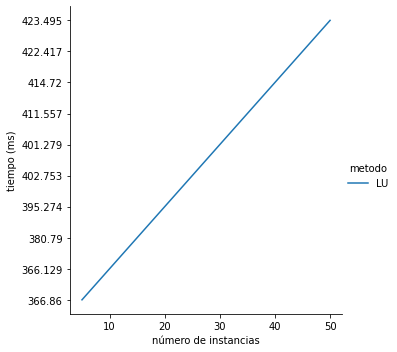

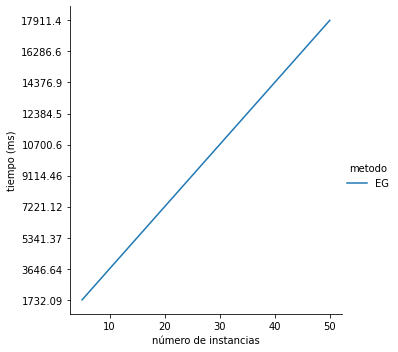

In [34]:
performanceLU=sns.relplot(x="ninst", y="tiempo", kind="line", data=df_resultados_prendido_con_inst_LU, hue="metodo");
performanceEG=sns.relplot(x="ninst", y="tiempo", kind="line", data=df_resultados_prendido_con_inst_EG, hue="metodo");
performanceLU.set(ylabel="tiempo (ms)", xlabel="número de instancias")
performanceEG.set(ylabel="tiempo (ms)", xlabel="número de instancias")
performanceLU.ax.invert_yaxis()
performanceEG.ax.invert_yaxis()
performanceLU.figure.savefig("performace-LU-prendido.png")
performanceEG.figure.savefig("performance-EG-prendido.png")
#sns.relplot(x="ninst", y="tiempo", kind="line", data=df_resultados_live_con_inst_LU);
#sns.relplot(x="ninst", y="tiempo", kind="line", data=df_resultados_live_con_inst_EG);

## heatmaps de performance


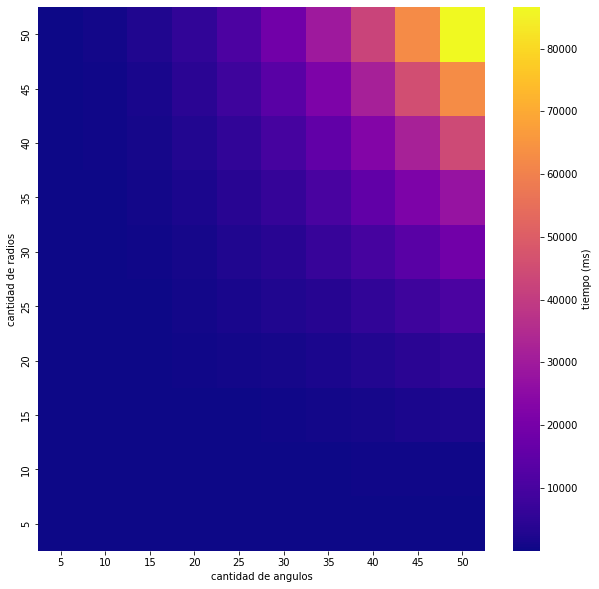

In [79]:
#tomo los datos para el heatmap de performance
def getNFromInstance(row):
    res = ""
    look=row.entrada.split("X")[0]
    for char in look:
        if char.isnumeric():
            res = res+char
    return int(res)

def getMFromInstance(row):
    res = ""
    look=row.entrada.split("X")[1]
    for char in look:
        if char.isnumeric():
            res = res+char
    return int(res)

def toFloat(row):
    return float(row.tiempo)
datosIdealEG = df_resultados_ideal_EG.copy()
datosIdealEG["n"] = datosIdealEG.apply(lambda row: getNFromInstance(row), axis=1)
datosIdealEG["m"] = datosIdealEG.apply(lambda row: getMFromInstance(row), axis=1)
datosIdealEG["tiempo"]=datosIdealEG.apply(lambda row: toFloat(row), axis=1)
heatmapData = datosIdealEG.pivot(columns="m", index="n", values="tiempo")
heatmapData = heatmapData.sort_index(axis=0)
heatmapData = heatmapData.sort_index(axis=1)

sns.color_palette("cubehelix")
fig, axs = plt.subplots(1,1, figsize=(10, 10))


grafico=sns.heatmap(heatmapData, ax=axs, fmt="d", cmap="plasma", cbar_kws={'label': 'tiempo (ms)'})
grafico.invert_yaxis()
grafico.set(xlabel="cantidad de angulos", ylabel="cantidad de radios")
grafico.figure.savefig("heatmapPerformanceIdealEG")

In [53]:
heatmapData

m,5,10,15,20,25,30,35,40,45,50
n,,,,,,,,,,
5,0.148268,1.01565,3.26496,7.09551,13.4963,23.6911,34.7704,45.8774,66.2363,89.8237
10,1.115410,7.57834,21.99330,45.91990,87.7801,150.1870,240.7360,358.2170,506.5530,642.0810
15,3.200470,22.93310,66.91130,153.05800,283.3930,508.8380,800.8300,1218.1900,1707.2900,2337.5700
20,7.211980,45.57670,152.23400,353.24400,697.0550,1234.2100,1819.2800,2886.0900,4071.4700,5621.3300
25,13.530500,91.19900,275.41200,683.61600,1376.5400,2387.6500,3418.7300,5426.5800,7973.3300,10781.5000
30,21.556900,149.50800,488.03600,1175.96000,2425.7400,3784.5200,6510.7500,9634.7500,13708.3000,18668.2000
35,32.459100,238.60600,794.48100,1894.36000,3851.8300,6412.4000,10399.7000,15285.3000,21533.5000,27560.4000
40,47.290100,360.79300,1187.58000,2764.71000,5584.0100,9569.3900,15278.5000,22909.0000,31990.8000,44033.0000
45,61.304400,504.47200,1571.61000,4075.94000,7874.2800,13533.7000,21490.8000,31753.7000,45624.6000,62783.3000


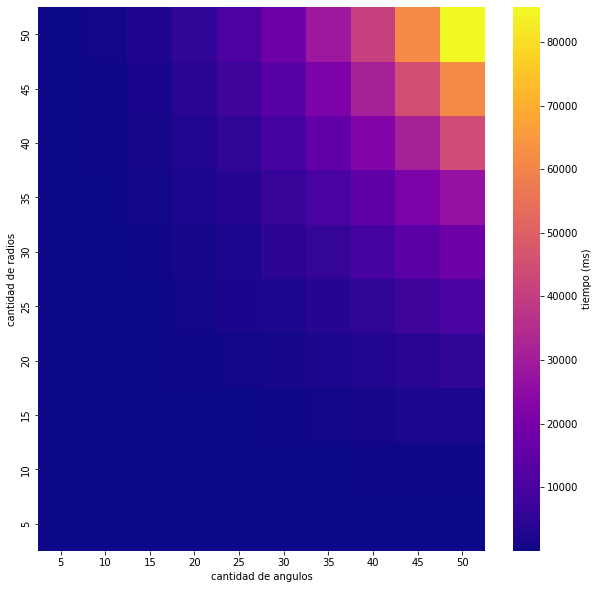

In [51]:
#tomo los datos para el heatmap de performance

datosIdealLU = df_resultados_inst_ideal_LU.copy()
datosIdealLU["n"] = datosIdealLU.apply(lambda row: getNFromInstance(row), axis=1)
datosIdealLU["m"] = datosIdealLU.apply(lambda row: getMFromInstance(row), axis=1)
datosIdealLU["tiempo"]=datosIdealLU.apply(lambda row: toFloat(row), axis=1)
heatmapData = datosIdealLU.pivot(columns="m", index="n", values="tiempo")
heatmapData = heatmapData.sort_index(axis=0)
heatmapData = heatmapData.sort_index(axis=1)

sns.color_palette("cubehelix")
fig, axs = plt.subplots(1,1, figsize=(10, 10))


grafico=sns.heatmap(heatmapData, ax=axs, fmt="d",cmap="plasma", cbar_kws={'label': 'tiempo (ms)'})
grafico.invert_yaxis()
grafico.set(xlabel="cantidad de angulos", ylabel="cantidad de radios")
grafico.figure.savefig("heatmapPerformanceIdealLU")

In [49]:
heatmapData

m,5,10,15,20,25,30,35,40,45,50
n,,,,,,,,,,
5,0.124937,0.994027,3.41945,7.35071,12.7556,20.2887,32.2367,43.7906,79.9074,90.5605
10,0.812935,7.048280,21.89010,45.69250,88.7074,152.8510,234.4500,346.4740,499.5310,640.8580
15,2.813340,21.990400,64.10370,150.27300,294.6570,487.6780,763.6770,1190.7100,1695.8100,2330.4400
20,6.960160,46.173000,152.28800,345.94800,683.4930,1173.4900,1842.0900,2736.9600,3994.3000,5433.5400
25,11.337000,92.832500,272.89300,690.58600,1348.7300,2324.9000,3516.2700,5592.0800,7887.7800,10499.7000
30,20.069700,146.047000,493.10900,1173.56000,2313.0300,4572.6100,6198.6700,9409.5200,13390.5000,17868.8000
35,34.590200,229.332000,771.72000,1856.04000,3647.0300,6429.1000,10127.3000,14665.1000,21040.1000,27021.7000
40,44.464300,370.940000,1197.48000,2727.93000,5326.6900,9356.8800,15246.4000,22749.1000,31196.2000,43999.5000
45,58.875500,505.171000,1592.08000,4058.34000,7694.1200,13281.2000,21118.3000,31207.4000,44895.8000,61326.2000


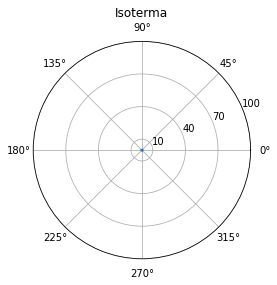

In [38]:
#Este codigo es de ejemplo, usa datos aleatorios

cantidad_puntos = 50
r = np.random.normal(0.5, 0.05, cantidad_puntos)
r[-1] = r[0] # Solo para que la isoterma se "pegue" bien al dar la vuelta
theta = np.linspace(0, 2*np.pi, cantidad_puntos)

fig, ax = plt.subplots(subplot_kw={'projection': 'polar'})
ax.plot(theta, r)
ax.set_rticks([10+90/3*x for x in range(4)])
ax.grid(True)

ax.set_title("Isoterma")
plt.show()

<ipython-input-18-b6a37d165c1b>:11: MatplotlibDeprecationWarning: shading='flat' when X and Y have the same dimensions as C is deprecated since 3.3.  Either specify the corners of the quadrilaterals with X and Y, or pass shading='auto', 'nearest' or 'gouraud', or set rcParams['pcolor.shading'].  This will become an error two minor releases later.
  grafico = ax.pcolor(theta, r, z, cmap='jet')


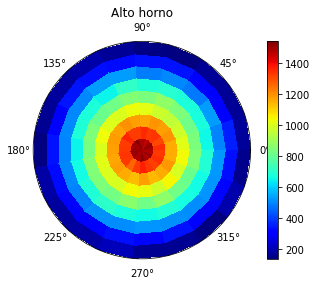

In [18]:
cantidad_angulos = 20
cantidad_radios = 10
theta = np.tile(np.linspace(0, 2*np.pi, cantidad_angulos), (cantidad_radios, 1)).transpose()
r = np.tile(np.linspace(0, 1, cantidad_radios), (cantidad_angulos, 1))
z = np.tile(np.linspace(1500,0,cantidad_radios), (cantidad_angulos,1))
z += np.random.standard_normal((cantidad_angulos,cantidad_radios))*20


fig, ax = plt.subplots(subplot_kw={'projection': 'polar'})

grafico = ax.pcolor(theta, r, z, cmap='jet')
ax.set_title('Alto horno')

ax.set_yticklabels([])

fig.colorbar(grafico)
plt.show()

/tmp/ipykernel_54547/2023886515.py:11: MatplotlibDeprecationWarning: Auto-removal of grids by pcolor() and pcolormesh() is deprecated since 3.5 and will be removed two minor releases later; please call grid(False) first.
  grafico = ax.pcolor(theta, r, z, cmap='jet')


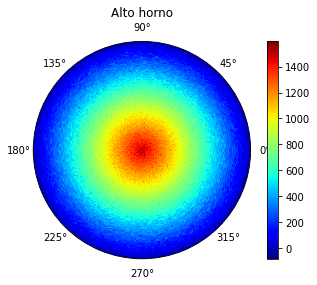

In [ ]:
cantidad_angulos = 200
cantidad_radios = 100
theta = np.tile(np.linspace(0, 2*np.pi, cantidad_angulos), (cantidad_radios, 1)).transpose()
r = np.tile(np.linspace(0, 1, cantidad_radios), (cantidad_angulos, 1))
z = np.tile(np.linspace(1500,0,cantidad_radios), (cantidad_angulos,1))
z += np.random.standard_normal((cantidad_angulos,cantidad_radios))*30


fig, ax = plt.subplots(subplot_kw={'projection': 'polar'})

grafico = ax.pcolor(theta, r, z, cmap='jet')
ax.set_title('Alto horno')

ax.set_yticklabels([])

fig.colorbar(grafico)
plt.show()

In [87]:

def mapaCalorDelHorno (radio_interno, radio_externo, cantidad_radios, cantidad_angulos, temperaturas, titulo) :
    #theta es la forma de la matriz que luego es curvada
    theta = np.tile(np.linspace(0, 2*np.pi, cantidad_angulos), (cantidad_radios, 1)).transpose()
    #r es la forma fisica del horno
    r = np.tile(np.linspace(radio_interno, radio_externo, cantidad_radios), (cantidad_angulos, 1))
    #z son los valores del horno, cada fila es un rayo desde el centro hacia afuera del horno
    z = np.array(temperaturas).reshape((cantidad_radios, cantidad_angulos)).T


    fig, ax = plt.subplots(subplot_kw={'projection': 'polar'})

    grafico = ax.pcolor(theta, r, z, cmap='jet')
    ax.set_title(titulo)

    ax.set_yticklabels([])

    fig.colorbar(grafico)
    plt.show()
    plt.savefig("test")
    

In [88]:
df_instancia_intercalada_heatmap = df_instancia_unica[df_instancia_unica["instancia"]=="instancia_intercalada"]
df_instancia_intercalada_heatmap = df_instancia_intercalada_heatmap.reset_index() 
for index, row in df_instancia_intercalada_heatmap.iterrows():
    mapaCalorDelHorno(row["radioInterno"], row["radioExterno"], int(row["radios"]), int(row["angulos"]), map(toFloat, row["lista_temperaturas"]), "titulo" )
        

In [141]:
def calcular_isoterma_para_un_angulo_dado(valor_isoterma, lista_de_temperaturas_de_un_angulo):
    if(float(lista_de_temperaturas_de_un_angulo[0]) < valor_isoterma):
        return 0.0

    cantRadios = len(lista_de_temperaturas_de_un_angulo)
    radio_anterior = 0
    temperatura_anterior = 0
    temperatura_posterior = 0
    for temperatura in lista_de_temperaturas_de_un_angulo:        
        if float(temperatura) >= valor_isoterma:
            radio_anterior += 1
            temperatura_anterior = float(temperatura)
        else:
            temperatura_posterior = float(temperatura)
            break
    
    pared_exterior = 100
    pared_interior = 10

    delta_r =  (pared_exterior - pared_interior)/(cantRadios-1)
    radio_anterior = radio_anterior*delta_r + pared_interior
    radio_posterior = radio_anterior + delta_r

    cuantos_grados_tengo_entre_los_radios = temperatura_anterior - temperatura_posterior

    #si en delta_r tengo tantos grados, en cuanto tengo isoterma - temperatura_posterior?
    #regla de 3 simples

    grados_de_distancia_entre_isoterma_y_posterior = valor_isoterma - temperatura_posterior
    
    distancia_entre_radio_posterior_e_isoterma = grados_de_distancia_entre_isoterma_y_posterior*delta_r/cuantos_grados_tengo_entre_los_radios

    punto_aproximado_de_la_isoterma = radio_posterior - distancia_entre_radio_posterior_e_isoterma

    return punto_aproximado_de_la_isoterma



#todas_las_temperaturas = df_instancia_unica.lista_temperaturas[0]
#cantidad_radios = int(df_instancia_unica.radios[0])
#cantidad_angulos = int(df_instancia_unica.angulos[0])

#temperaturas_del_angulo_cero = []
#for i in range(cantidad_radios):
#    temperaturas_del_angulo_cero.append(todas_las_temperaturas[cantidad_angulos*i])

#calcular_isoterma_para_un_angulo_dado(500, temperaturas_del_angulo_cero)

In [88]:
def mostrarIsoterma (archivo_salida, radio_interno, radio_externo, cantidad_angulos, puntos_isoterma, titulo) :

    r = puntos_isoterma
    r[-1] = r[0] # Solo para que la isoterma se "pegue" bien al dar la vuelta
    theta = np.linspace(0, 2*np.pi, cantidad_angulos)

    fig, ax = plt.subplots(subplot_kw={'projection': 'polar'})
    ax.plot(theta, r)
    ax.set_rticks([radio_interno+(radio_externo - radio_interno)/3*x for x in range(4)])
    ax.grid(True)

    ax.set_title(titulo)
    plt.savefig(archivo_salida)

In [144]:
def calcularIsotermaDeUnArchivo(tipo_instancia):
    df = pd.DataFrame()
    if tipo_instancia == "instancia_ideal" or tipo_instancia == "instancia_intercalada" :
        df = df_instancia_unica[df_instancia_unica.instancia == tipo_instancia]
    elif tipo_instancia == "instancia_prendido":
        df = df_multiples_instancias[df_multiples_instancias.instancia == tipo_instancia]

    for i in df.index :
        df_i = df.loc[i]

        instancia = 1
        for temperaturas in np.array(df_i.lista_temperaturas).reshape((int(df_i.numero_de_instancias), int(df_i.angulos)*int(df_i.radios))) :
            puntos_isoterma = []
            for rayo_de_temperaturas in temperaturas.reshape((int(df_i.radios), int(df_i.angulos))).T :
                punto = calcular_isoterma_para_un_angulo_dado(500, rayo_de_temperaturas)
                puntos_isoterma.extend([punto])
                

            if tipo_instancia == "instancia_ideal" or tipo_instancia == "instancia_intercalada" :
                instancia += 1
                mostrarIsoterma(f"./graficos/{tipo_instancia}/{tipo_instancia}_{df_i.radios}X{df_i.angulos}.png", 10, 100,  int(df_i.angulos), puntos_isoterma, f"Isoterma 500 de {df_i.radios}x{df_i.angulos}" )
            elif tipo_instancia == "instancia_prendido":
                mostrarIsoterma(f"./graficos/{tipo_instancia}/{tipo_instancia}_{df_i.numero_de_instancias}_instancia_{instancia}.png", 10, 100, int(df_i.angulos), puntos_isoterma, f"Isoterma 500 de instancia {instancia}/{df_i.numero_de_instancias}")
                instancia += 1

#calcularIsotermaDeUnArchivo("instancia_ideal")
#calcularIsotermaDeUnArchivo("instancia_intercalada") 
#calcularIsotermaDeUnArchivo("instancia_prendido")  

['1500.000000' '1370.281544' '1264.388926' '1174.927920' '1097.484058'
 '1029.211164' '968.167131' '912.967667' '862.591312' '816.262784'
 '773.379688' '733.464577' '696.132493' '661.068341' '628.010696'
 '596.739926' '567.069290' '538.838114' '511.906424' '486.150634'
 '461.459967' '437.733409' '414.876999' '392.801355' '371.419313'
 '350.643595' '330.384440' '310.547113' '291.029251' '271.717973'
 '252.486702' '233.191633' '213.667809' '193.724722' '173.141385'
 '151.660822' '128.983885' '104.762351' '78.591198' '50.000000']
54.912957197047874
['1500.000000' '1370.281544' '1264.388928' '1174.927927' '1097.484081'
 '1029.211231' '968.167305' '912.968084' '862.592240' '816.264729'
 '773.383556' '733.471925' '696.145906' '661.091973' '628.051042'
 '596.806894' '567.177664' '539.009511' '512.171893' '486.554038'
 '462.062351' '438.618562' '416.158481' '394.631282' '373.999250'
 '354.237950' '335.336817' '317.300142' '300.148476' '283.920451'
 '268.675056' '254.494395' '241.486944' '229.7